In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using snscrape to scrape twitter data

In [3]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 8.2 MB/s eta 0:00:00


In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

Using Twitter's Advanced Search function, the query can be optimized based on specific hashtags ranging to and from a particular time as well as other useful features like likes and retweets. We focus mostly on the hashtags #politics, #democrats, #republicans, #democrat, #republican from 2020-09-01 to 2021-02-25. This made sense to us because the range of date covered important political movements like the Presidential Election in 2020 but also witnessed a surplus of political commentary on subjects like healthcare, social justice, economics all whilst a global pandemic occured. 

In [5]:
query = "(#politics OR #democrats OR #republicans OR #political OR #blm OR #democrat OR #republican OR #reps OR #dems OR #guncontrol OR #abortion OR #roevwade OR #congress OR #shooting) until:2023-02-25 since:2020-01-01 word lang:en"
tweets = []
limit = 5000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content, tweet.hashtags, tweet.user.location, tweet.lang, tweet.likeCount])



<ipython-input-5-75181865fe58>:12: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.content, tweet.hashtags, tweet.user.location, tweet.lang, tweet.likeCount])


In [7]:
df = pd.DataFrame(tweets)
df.columns = [ "tweets", "hashtags", "location","language", "likeCount"]

df


,tweets,hashtags,location,language,likeCount
0,Such interesting truth is discovered in old Ne...,"[JimCrow, DEMOCRAT, JoeBiden]","San Diego, CA",en,1
1,How to Protect Yourself During the 2023 Nigeri...,[Politics],Nigeria,en,3
2,Post new RSS feed items containing a specific ...,"[luna, cryptoartmerch, icerket, mdzsww, ronald...","San Antonio, TX",en,1
3,@realTuckFrumper #GovernmentControlledMedia? S...,"[GovernmentControlledMedia, PrivateCompanies, ...",,en,0
4,RT @MOAbortionFund \n\nAbortion bans dispropor...,[abortion],Yakima | Renton | Tacoma,en,2
...,...,...,...,...,...
4995,#CongressMP Manish Tewari criticised the use o...,"[CongressMP, Congress, AdhirChowdhury, Slander...",,en,0
4996,A word that you have spoken hundreds of time i...,"[congress_is_liar, adhir_is_liar, congress]",Ahmedabad,en,0
4997,#JonStewart is the best of #America.\nThis was...,"[JonStewart, America, Congress, FirstResponders]",,en,23
4998,Cmon you filthy disgusting corrupt politicians...,"[Democrats, BidenRecession, BidenDestroysAmeri...","New York, USA",en,0


Now, we bring in our nlp library to clean and pre-process our tweets.

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# Load the stop words list
stop_words = set(stopwords.words('english'))

# Define a function to extract words from a text
def extract_words(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Remove non-alphabetic characters
    words = [word for word in words if word.isalpha()]
    return words

# Apply the function to a column in your data frame
df['words'] = df['tweets'].apply(extract_words)


In [19]:
df

,tweets,hashtags,location,language,likeCount,words
0,Such interesting truth is discovered in old Ne...,"[JimCrow, DEMOCRAT, JoeBiden]","San Diego, CA",en,1,"[interesting, truth, discovered, old, newspape..."
1,How to Protect Yourself During the 2023 Nigeri...,[Politics],Nigeria,en,3,"[protect, nigerian, general, election, guide, ..."
2,Post new RSS feed items containing a specific ...,"[luna, cryptoartmerch, icerket, mdzsww, ronald...","San Antonio, TX",en,1,"[post, new, rss, feed, items, containing, spec..."
3,@realTuckFrumper #GovernmentControlledMedia? S...,"[GovernmentControlledMedia, PrivateCompanies, ...",,en,0,"[realtuckfrumper, governmentcontrolledmedia, p..."
4,RT @MOAbortionFund \n\nAbortion bans dispropor...,[abortion],Yakima | Renton | Tacoma,en,2,"[rt, moabortionfund, abortion, bans, dispropor..."
...,...,...,...,...,...,...
4995,#CongressMP Manish Tewari criticised the use o...,"[CongressMP, Congress, AdhirChowdhury, Slander...",,en,0,"[congressmp, manish, tewari, criticised, use, ..."
4996,A word that you have spoken hundreds of time i...,"[congress_is_liar, adhir_is_liar, congress]",Ahmedabad,en,0,"[word, spoken, hundreds, time, career, adhir, ..."
4997,#JonStewart is the best of #America.\nThis was...,"[JonStewart, America, Congress, FirstResponders]",,en,23,"[jonstewart, best, america, powerful, speech, ..."
4998,Cmon you filthy disgusting corrupt politicians...,"[Democrats, BidenRecession, BidenDestroysAmeri...","New York, USA",en,0,"[cmon, filthy, disgusting, corrupt, politician..."


In [20]:
df.to_csv("TwitterData1.csv")


Each tweet has been tokenized. A new column has been added to our dataframe

In [21]:
df['words']

0       [interesting, truth, discovered, old, newspape...
1       [protect, nigerian, general, election, guide, ...
2       [post, new, rss, feed, items, containing, spec...
3       [realtuckfrumper, governmentcontrolledmedia, p...
4       [rt, moabortionfund, abortion, bans, dispropor...
                              ...                        
4995    [congressmp, manish, tewari, criticised, use, ...
4996    [word, spoken, hundreds, time, career, adhir, ...
4997    [jonstewart, best, america, powerful, speech, ...
4998    [cmon, filthy, disgusting, corrupt, politician...
4999    [bjp, focusing, wrong, issues, one, cares, con...
Name: words, Length: 5000, dtype: object

Now, we check the word counts for each of the tokenized words!

In [ ]:
from collections import Counter

# Extract all words from the dataframe and create a list of words
words_list = [word for words in df['words'] for word in words]
# Count the occurrences of each word
word_counts = Counter(words_list)

# Print the top 10 most common words and their counts
word_counts.most_common()

In [ ]:
word = list(word_counts.keys())
count = list(word_counts.values())


In [50]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool

# Create a DataFrame of the word counts
df = pd.DataFrame({'Word': word, 'Count': count})

# Create a ColumnDataSource for the plot
source = ColumnDataSource(df)

# Create the figure with Bokeh
p = figure(x_range=word, plot_height=500, plot_width=800,
           title='Word Counts', x_axis_label='Word', y_axis_label='Count')

# Add the scatter plot glyphs
p.circle(x='Word', y='Count', size=10, source=source, line_color='black', fill_alpha=0.8)

# Add a hover tool to display the word and count when hovering over a marker
hover = HoverTool(tooltips=[('Word', '@Word'), ('Count', '@Count')])
p.add_tools(hover)

# Show the plot
show(p)


NameError: ignored

Visuals of the words (with an axis!)

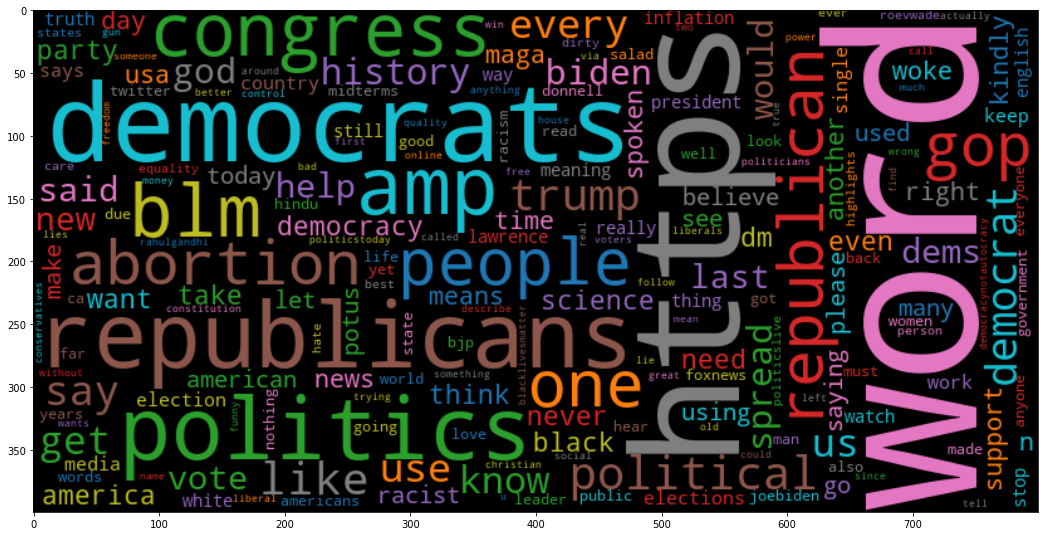

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap="tab10").generate_from_frequencies(word_counts)

# Display the word cloud image
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

##TEST TEST TEST##

In [ ]:
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()
#fit with list of words that are unique
labelEncoder.fit(uniqueWords)

#final words that are 
encodedWords = labelEncoder.transform(allWords)